## Problem Statement

Each time an RPC is send out from an Service Center (SC), it starts a new trip.

Assume the true mean of trip durations being 100 days.

A key task to ensure the SmartCycle is efficient is to understand how many RPCs are being lost over a period of time so the pool can be replenished appropriately. The probability that an RPC is lost during a trip is called shrinkage rate.

The methods applied to do this vary and complement each other. For the sake of simplicity, we concentrate on asset based methods in this challenge.

Assume we can measure the rental date when an asset leaves an SC.

- Scenario one: Assume we can measure the rental date for 100% of trips.
- Scenario two: Assume we can only measure the rental date a percentage of trips, substantially smaller than 100%.

Your stakeholder tasks you with the following question, underlying scenario one:

- Develop a model to estimate the shrinkage rate, i.e. the probability of an asset not returning from a trip
- Develop a model to estimate the pool size, i.e. the amount of assets available to at a given time.

In [182]:
# Add the src directory to the Python path
import sys
sys.path.append('..')

# global imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.special import gamma 
from datetime import datetime, timedelta

# local imports
from src.data import Data

np.random.seed(123)

# Assumptions

In [183]:
# mean of trip duration
mean_trip_duration = 100
# standard deviation of the distribution
std_trip_duration = 0.2
# convert std to deviation
deviation_trip_duration = std_trip_duration * mean_trip_duration
# size of the distribution
number_of_trips = 10000
# shrinkage rate
shrinkage_rate = 0.05
# start date
start_date = datetime(2021, 1, 1)
# years to simulate
years_to_simulate = 2
# confidence interval
confidence_interval = 0.95

## Distribution of trip duration

The distribution of trip durations can vary based on the proximity of stakeholders to the warehouse. For example, if all stakeholders place an equal number of orders and are evenly distributed geographically, we can expect the distribution of trip durations to resemble a normal distribution.

Conversely, if most stakeholders are located near the warehouse while some are situated in other countries, the trip durations will differ significantly. Stakeholders closer to the warehouse, who make up the majority, are likely to experience shorter trip durations. In contrast, those located further away may face longer trips due to increased travel time and logistical challenges. This scenario could be represented by an exponential distribution.

To allow several scenarios we had developed an streamlit-app ready to perform the analysis under different distributions.

We ran several distribution simulations to visualize the impact of different distribution types on trip durations.

Normal Distribution: Calculated Mean: 100.19423784583192, Calculated Standard Deviation: 19.96227709180295
Log-Normal Distribution: Calculated Mean: 100.22146514935685, Calculated Standard Deviation: 20.34790620110361
Weibull Distribution: Calculated Mean: 100.09108759492761, Calculated Standard Deviation: 42.48327609008664
Exponential Distribution: Calculated Mean: 101.17671015857842, Calculated Standard Deviation: 100.3392340733104
Poisson Distribution: Calculated Mean: 100.0961, Calculated Standard Deviation: 10.113192611139175


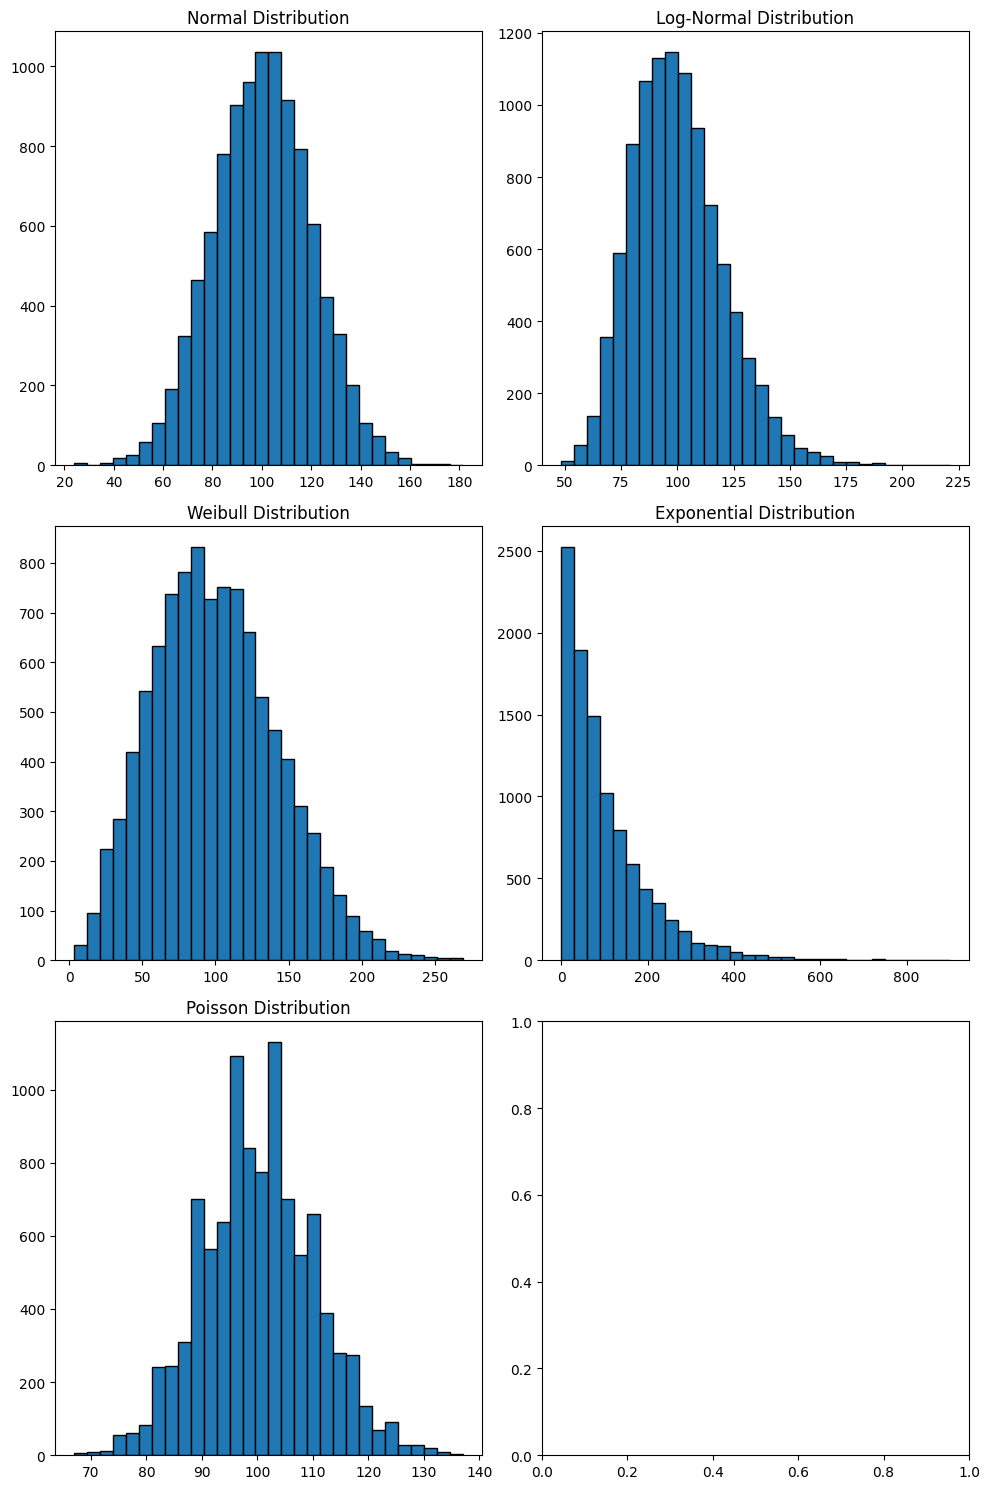

In [184]:
from src.data import Data
shape = 2.5
data = Data()
trip_duration_normal = data.generate_normal_distribution(mean=mean_trip_duration, deviation=deviation_trip_duration, sample_size=number_of_trips)
print(f'Normal Distribution: Calculated Mean: {trip_duration_normal.mean()}, Calculated Standard Deviation: {trip_duration_normal.std()}')
trip_duration_lognormal = data.generate_lognormal_distribution(mean=mean_trip_duration, std=std_trip_duration, sample_size=number_of_trips)
print(f'Log-Normal Distribution: Calculated Mean: {trip_duration_lognormal.mean()}, Calculated Standard Deviation: {trip_duration_lognormal.std()}')
trip_duration_weibull = data.generate_weibull_distribution(mean=mean_trip_duration, shape=shape, sample_size=number_of_trips)
print(f'Weibull Distribution: Calculated Mean: {trip_duration_weibull.mean()}, Calculated Standard Deviation: {trip_duration_weibull.std()}')
trip_duration_exponential = data.generate_exponential_distribution(mean=mean_trip_duration, sample_size=number_of_trips)
print(f'Exponential Distribution: Calculated Mean: {trip_duration_exponential.mean()}, Calculated Standard Deviation: {trip_duration_exponential.std()}')
trip_duration_poisson = data.generate_poisson_distribution(mean=mean_trip_duration, sample_size=number_of_trips)
print(f'Poisson Distribution: Calculated Mean: {trip_duration_poisson.mean()}, Calculated Standard Deviation: {trip_duration_poisson.std()}')

# plot the histograms of the distributions in a 3x2 grid
fig, axs = plt.subplots(3, 2, figsize=(10, 15))
axs[0, 0].hist(trip_duration_normal, bins=30, edgecolor='black')
axs[0, 0].set_title('Normal Distribution')
axs[0, 1].hist(trip_duration_lognormal, bins=30, edgecolor='black')
axs[0, 1].set_title('Log-Normal Distribution')
axs[1, 0].hist(trip_duration_weibull, bins=30, edgecolor='black')
axs[1, 0].set_title('Weibull Distribution')
axs[1, 1].hist(trip_duration_exponential, bins=30, edgecolor='black')
axs[1, 1].set_title('Exponential Distribution')
axs[2, 0].hist(trip_duration_poisson, bins=30, edgecolor='black')
axs[2, 0].set_title('Poisson Distribution')
plt.tight_layout()
plt.show()
data.generate_data(start_date, years_to_simulate, number_of_trips, trip_duration_weibull, shrinkage_rate)

## Generate data using normal distribution

In [185]:
trip_duration_distribution = Data().generate_normal_distribution(mean=mean_trip_duration, deviation=deviation_trip_duration, sample_size=number_of_trips)
df = Data()
df.generate_data(start_date, years_to_simulate, number_of_trips, trip_duration_distribution, shrinkage_rate)

In [186]:
df

,trip_id,rental_date,return_date,trip_duration,is_lost,is_returned
0,0,2022-01-29,2022-05-05 04:45:23.780780,96.198192,0,1
1,1,2021-07-12,2021-09-20 08:38:49.245100,70.360292,0,1
2,2,2021-09-07,2022-01-06 11:54:40.567141,121.496303,0,1
3,3,2022-11-04,2023-01-27 13:08:03.146235,84.547259,0,1
4,4,2022-08-05,2022-11-01 12:32:30.054640,88.522570,0,1
...,...,...,...,...,...,...
9995,9995,2022-07-22,2022-11-08 16:21:19.213222,109.681472,0,1
9996,9996,2022-04-26,2022-07-31 15:54:09.455039,96.662609,0,1
9997,9997,2022-08-18,2022-10-31 21:35:59.236206,74.899991,0,1
9998,9998,2021-10-05,2022-01-29 09:11:00.024826,116.382639,0,1


# Survival model using Kaplan-Meier

<Axes: xlabel='timeline'>

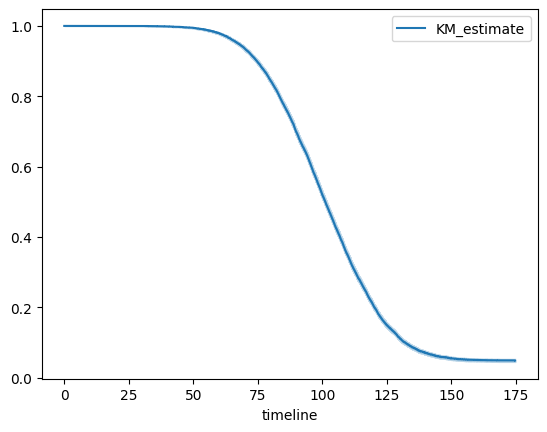

In [187]:
from lifelines import KaplanMeierFitter

# Initialize and fit Kaplan-Meier Fitter
alpha = 1 - confidence_interval
# replace the nan values with the maximum trip duration
kmf = KaplanMeierFitter(alpha=alpha)
kmf.fit(durations=df['trip_duration'], event_observed=df['is_returned'])
# Plot survival curve
kmf.plot_survival_function()

# Pool size

The pool size model simulates the availability of reusable packaging containers (RPCs) over a specified time period, taking into account rental rates, return probabilities, and shrinkage rates. It tracks the number of assets in the pool, those rented out, those returned, and those lost due to shrinkage.

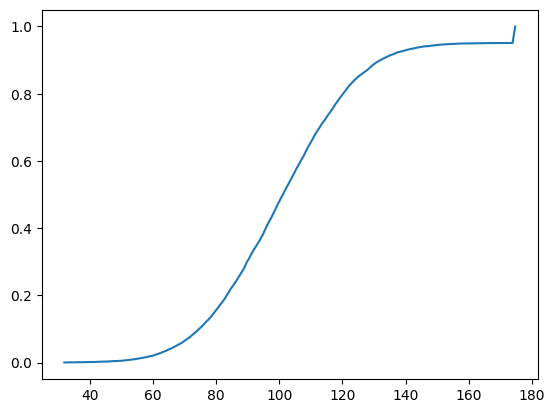

In [188]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
Z = np.random.normal(size = N)
# method 1
max_day = int(np.max(df['trip_duration']))
H,X1 = np.histogram(df['trip_duration'], bins=max_day, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
#method 2
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X1[1:], F1)
plt.show()

In [189]:
H,X1 = np.histogram(df['trip_duration'], bins=max_day, density = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
# Convert the cumulative distribution function (CDF) F1 to a probability density function (PDF)
pdf = np.gradient(F1, dx)
# Normalize the PDF to ensure it sums to 1
pdf /= np.sum(pdf)

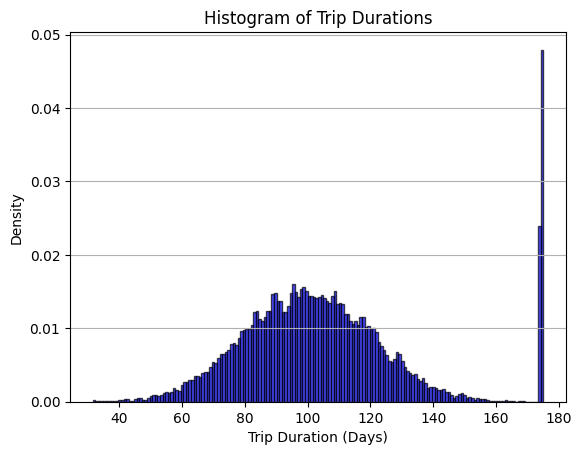

In [190]:
# plot H in bars 
plt.bar(X1[1:], pdf, width=dx, alpha=0.7, color='blue', edgecolor='black')
plt.title("Histogram of Trip Durations")
plt.xlabel("Trip Duration (Days)")
plt.ylabel("Density")
plt.grid(axis='y')
plt.show()


Day: 1
Pool size: 900
Return probability: 0.00014642717688402934
Assets out: 100
Assets lost: 0.0
Day: 2
Pool size: 900.0146427176884
Return probability: 4.8809058961343355e-05
Assets out: 99.9853572823116
Assets lost: 0.0
Day: 3
Pool size: 900.0195229088872
Return probability: 4.8809058961343355e-05
Assets out: 99.98047709111273
Assets lost: 0.0
Day: 4
Pool size: 900.0244028618886
Return probability: 4.8809058961343355e-05
Assets out: 99.97559713811141
Assets lost: 0.0
Day: 5
Pool size: 900.029282576704
Return probability: 4.8809058961343355e-05
Assets out: 99.970717423296
Assets lost: 0.0
Day: 6
Pool size: 900.0341620533451
Return probability: 9.76181179226858e-05
Assets out: 99.96583794665487
Assets lost: 0.0
Day: 7
Pool size: 900.043920530302
Return probability: 0.00014642717688402915
Assets out: 99.95607946969795
Assets lost: 0.0
Day: 8
Pool size: 900.0585568168311
Return probability: 9.761811792268659e-05
Assets out: 99.94144318316881
Assets lost: 0.0
Day: 9
Pool size: 900.068312

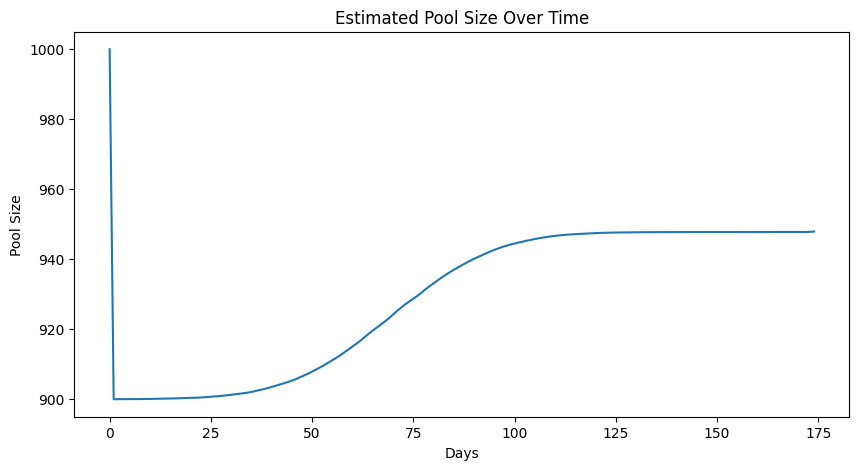

In [191]:
initial_pool_size = 1000
rental_rate = 100
days_to_simulate = 365  # Number of days to simulate (1 year)
#shrinkage_rate = 0.1
# Simulate assets rented out and returned over time
available_assets = initial_pool_size
assets_out = 0
assets_returned = 0
assets_lost = 0
# Create a list to store the pool size over time
pool_sizes = []
pool_sizes.append(available_assets)
rented_today = rental_rate
available_assets = initial_pool_size - rented_today
assets_out += rented_today
pool_sizes.append(available_assets)

for day in range(1, max_day):
    print(f'Day: {day}')
    print(f'Pool size: {available_assets}')
    return_probability_day = pdf[day]
    print(f'Return probability: {return_probability_day}')
    survival_rate = kmf.survival_function_at_times(day).values[0]
    print(f'Assets out: {assets_out}')
    lost_today = int(assets_out * (1 - survival_rate) * return_probability_day)
    lost_today = assets_out * (1 - survival_rate) * return_probability_day
    assets_lost += lost_today
    print(f'Assets lost: {assets_lost}')
    # Update the number of assets out (subtract the ones that have returned)
    assets_out -= lost_today
    returned_today = (assets_out * return_probability_day * survival_rate)
    assets_out -= returned_today
    available_assets += returned_today
    pool_sizes.append(available_assets)
# Plot the pool size over time
plt.figure(figsize=(10, 5))
plt.plot(pool_sizes)
# add the max pool size as text to the plot
plt.title("Estimated Pool Size Over Time")
plt.xlabel("Days")
plt.ylabel("Pool Size")
#plt.ylim(0, max(pool_sizes))  # Limit y-axis from 0 to max pool size
plt.show()